# Importar Librerías

In [33]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Cargar el Dataset

In [34]:
df = pd.read_csv('C:/Users/mitev/Desktop/Prácticas/chocolate_sales_proyect/dataset/Chocolate Sales.csv')

In [35]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


# Modelo Holt Winters

In [36]:
df["Amount"] = df["Amount"].replace('[\\$,]', '', regex=True).astype(float)

In [37]:
df["Date"] = pd.to_datetime(df["Date"])

In [38]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


In [39]:
# Agregar las ventas por mes
ts = df.set_index('Date').resample('M')['Amount'].sum()

In [40]:
# Ajustar modelo Holt (solo tendencia aditiva, sin estacionalidad por falta de ciclos completos)
model = ExponentialSmoothing(ts, trend='add', seasonal=None)
hw_fit = model.fit()

# Pronosticar los siguientes 3 meses
forecast = hw_fit.forecast(3)

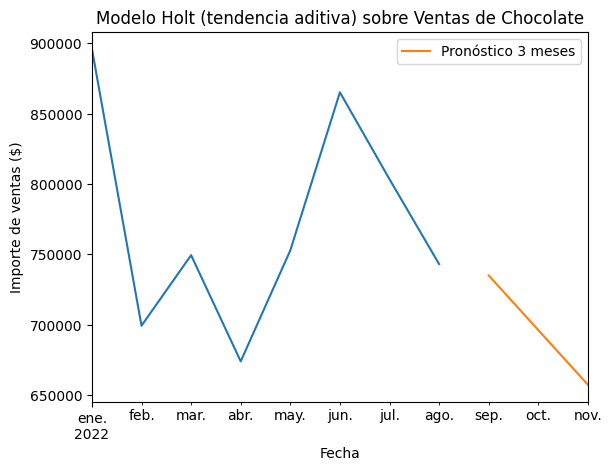

In [41]:
# Gráfico de serie histórica y pronóstico
plt.figure()
ts.plot(label='Ventas mensuales')
forecast.plot(label='Pronóstico 3 meses', legend=True)
plt.title('Modelo Holt (tendencia aditiva) sobre Ventas de Chocolate')
plt.xlabel('Fecha')
plt.ylabel('Importe de ventas ($)')
plt.show()